In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Считываем данные 
churn_data = pd.read_csv('data/churn.csv')
# Удаляем ненужный столбец
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


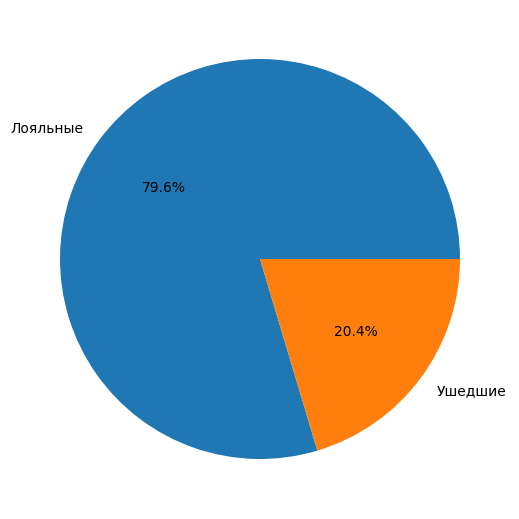

In [261]:
# 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

# Для сравнения двух категориальных признаков можно использовать круговую диаграмму
# Выделим данные по лояльности
exited_data = churn_data['Exited'].value_counts()

# Построим круговую диаграмму
fig_1 = plt.figure(figsize=(5, 5))
axes_1 = fig_1.add_axes([0, 0, 1, 1])
axes_1.pie(
    exited_data,
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%'
);

# На диаграмме видно, что процент ушедших клиентов 20.4, а процент лояльных 79.6, соотношение примерно 1к4.

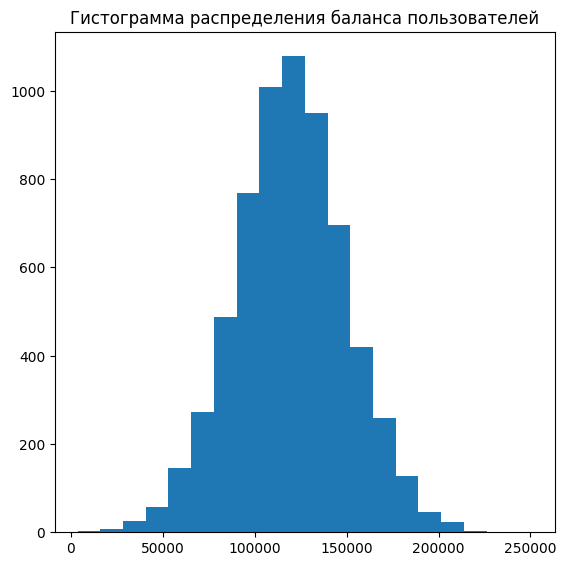

In [263]:
# 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

# Для построения распределения используется гистограмма.
# Поставим фильтр на баланс выше 2500 долларов
not_low_balance = churn_data[churn_data['Balance'] > 2500]

# Построим гистограмму по этим данным
fig_2 = plt.figure(figsize=(5, 5))
axes_2 = fig_2.add_axes([0, 0, 1, 1])
axes_2.hist(
    x=not_low_balance['Balance'], bins=20
)
axes_2.set_title("Гистограмма распределения баланса пользователей");

# Данная гистограмма показывает, что наибольшее количество пользователей имеют имеют баланс от 100 до 150 тыс. долларов

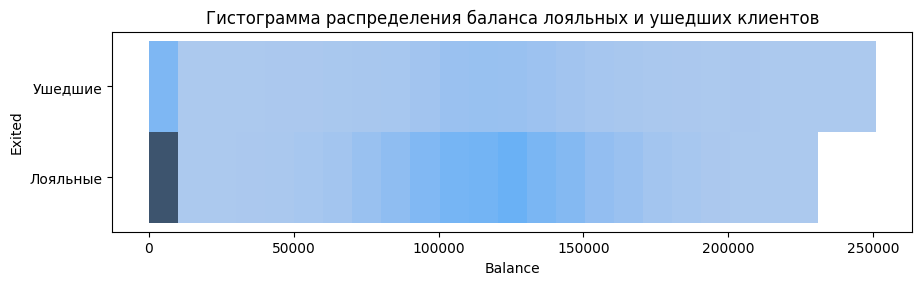

In [3]:
# 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

# Будем строить гистограмму распределения для лояльных и ушедших клиентов
# Для начала скопируем датафрейм и поменяем значения в колонке 'Exited' для более наглядного отображения.
new_churn_data = churn_data
new_churn_data['Exited'] = new_churn_data['Exited'].astype(str)
new_churn_data['Exited'] = new_churn_data['Exited'].apply(lambda x: 'Лояльные' if x == '0' else 'Ушедшие')

# Построим гистограмму
fig_3 = plt.figure(figsize=(8, 2))
axes_3 = fig_3.add_axes([0, 0, 1, 1])
sns.histplot(
    data=new_churn_data,
    x='Balance',
    y='Exited',
    bins=25,
    ax=axes_3
)
axes_3.set_title('Гистограмма распределения баланса лояльных и ушедших клиентов', fontsize=12);

# Гистограмма показывает, что в целом среди лояльных и ушедших клиентов преобладает категория с балансом около нуля. Однако среди лояльных клиентов гораздо 
# больше людей с малым балансом по сравнению с ушедшими. Также мы видим, что баланс у ушедших распределен равномерно и максимальный депозит немного превышает
# максимальный депозит лояльных. Предположу что банк предлягает улучшенные условия для клиентов с депозитом от 100000, однако проигрывает конкурентам в условиях
# для более состоятельных клиентов. При этом возможно у банка хорошая рекламная кампания для привлечения новых клиентов, о чем свидетельствует большое количество
# малых депозитов.

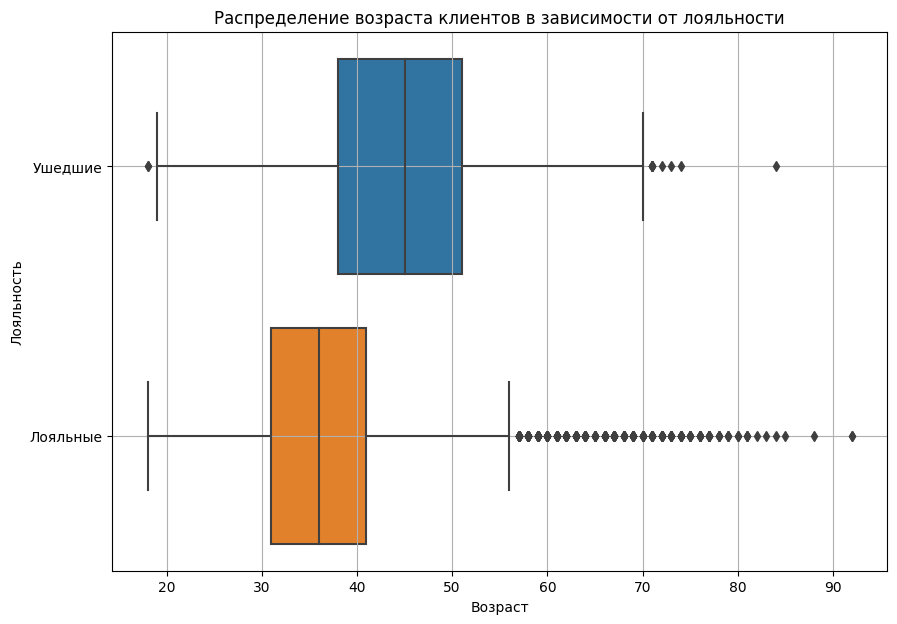

In [265]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

# Для данного задания будем строить коробчатую диаграмму, взяв датафрейм из предыдущего задания.
fig_4 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=new_churn_data,
    y='Exited',
    x='Age',
    orient='h'
)
boxplot.set_title('Распределение возраста клиентов в зависимости от лояльности');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

# Диаграмма показывает, что больше выбросов имеет группа лояльных клиентов. Это связано с тем, что средний возраст лояльных клиентов 
# небольшой и находится в диапазоне 31-41 год. Поэтому редкие клиенты старше 55 лет выходят за границы 75 квантиля и уже являются выбросами.
# Банку следует обратить внимание на возрастную группу старше 40 лет.


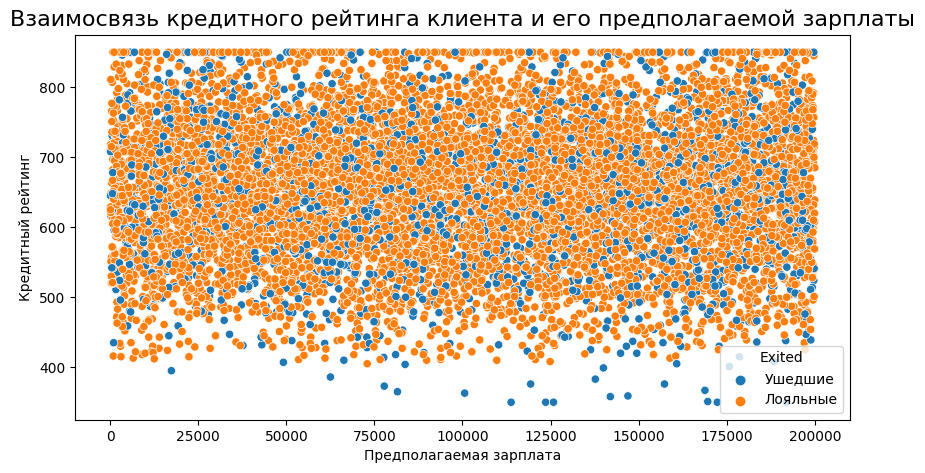

In [266]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока 
# клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

# Для решения данной задачи потребуется построить диаграмму рассеяния 
fig_5 = plt.figure(figsize=(10, 5))
scatterplot = sns.scatterplot(
    data=new_churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Предполагаемая зарплата')
scatterplot.set_ylabel('Кредитный рейтинг');

# На диаграмме не вижу никакой взаимосвязи. Только у ушедших клиентов есть рейтинг ниже 400

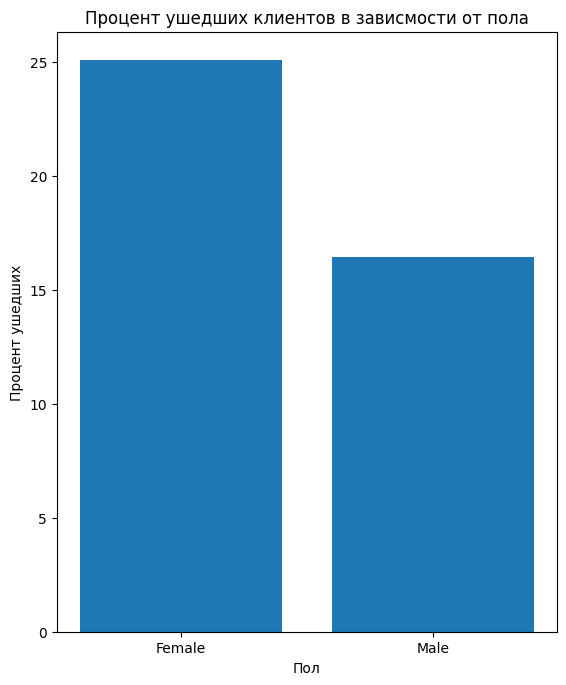

In [269]:
#  9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

# Здесь подойдет столбчатая диаграмма
# Для начала сгруппируем данные по признаку пола и вычислим процент ушедших
gender_exited_percent = churn_data.groupby('Gender')['Exited'].mean() * 100

#Визуализируем график
fig_6 = plt.figure(figsize=(5, 6))
axes_6 = fig_6.add_axes([0, 0, 1, 1])
axes_6.bar(x = gender_exited_percent.index, height = gender_exited_percent)
axes_6.set_ylabel('Процент ушедших')
axes_6.set_xlabel('Пол')
axes_6.set_title('Процент ушедших клиентов в зависмости от пола');

# График показывает, что женщины уходят значительно чаще: 25% против 17% у мужчин. 

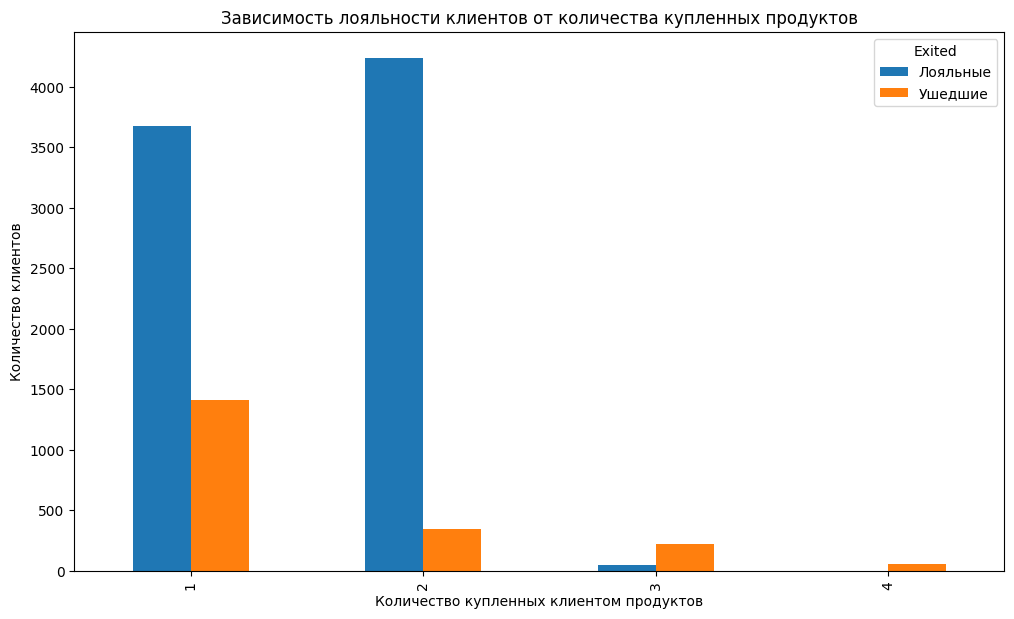

In [10]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

# Создадим сводную таблицу, в которой количество продуктов будет являться индексами, а столбцы - это показатель лояльности, в ячейках таблицы количество 
# клиентов. Возможные пропуски заменим на 0.
pivot_1 = new_churn_data.pivot_table(
    values='CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count',
    fill_value=0
)
# Построим диаграмму
fig_7, axes_7 = plt.subplots(figsize=(12, 7))
pivot_1.plot(
    kind='bar', 
    ax=axes_7
)
axes_7.set_title('Зависимость лояльности клиентов от количества купленных продуктов')
axes_7.set_xlabel('Количество купленных клиентом продуктов')
axes_7.set_ylabel('Количество клиентов');

# На диаграмме видно, что с увеличением количества купленных продуктов с 1 до 2 соотношение ушедших клиентов к лояльным уменьшается, что говорит о положительной 
# для банка динамике. Однако также видно, что клиенты не горят желанием покупать больше 2 продуктов в банке и, более того, среди малочисленных клиентов с 
# количеством продуктов больше 2 преобладает доля ушедших. 

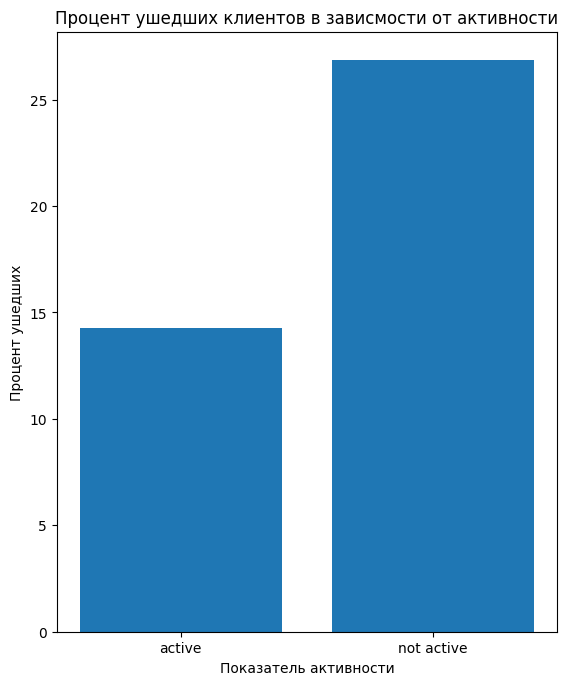

In [185]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
# чтобы уменьшить отток клиентов среди неактивных?

# Скопируем датафрейм и изменим значения в столбце IsActiveMember для более удобного отображения
new_df = churn_data
new_df['IsActiveMember'] = new_df['IsActiveMember'].apply(lambda x: 'active' if x == 1 else 'not active')

# Сгруппируем таблицу по признаку активности клиентов и найдем процент ушедших у каждой группы.
grouped_by_active = new_df.groupby('IsActiveMember')['Exited'].mean() * 100

# Построим столбчатую диаграмму
fig = plt.figure(figsize=(5, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = grouped_by_active.index, height = grouped_by_active)
axes.set_ylabel('Процент ушедших')
axes.set_xlabel('Показатель активности')
axes.set_title('Процент ушедших клиентов в зависмости от активности');

# Мы видим что процент ушедших среди активных клиентов составляет 14%, а среди неактивных 27% - отличие практически в два раза. Для полной картины необходимо
# понимать по каким показателям клиенту присваивается статус активного. Могу предположить исходя из предыдущих выводов, что банк умеет привлекать новых 
# клиентов, однако мало делает для того, чтобы поддерживать интерес у действующих. Возможно следует ввести какие то розыгрыши за объем операций по карте, делать 
# совместные акции с магазинами для повышенного кэшбека и т.д.


In [41]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.

# Сгруппируем наш датафрейм по признаку Geography и посчитаем долю ушедших клиентов по странам.
country_grouped = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

# Построим график, отображающий данные на карте мира с помощью библиотеки Plotly.
fig = px.choropleth(
    data_frame=country_grouped,
    locations='Geography',
    locationmode = 'country names', 
    color='Exited',  
    range_color=[0, 1],
    title='Доля ушедших клиентов на карте мира',
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)
fig.show()

# По картограмме видно, что доля ушедших клиентов в германии в 2 раза выше по сравнению с Испанией и Францией. Могу предположить что в Германии более серьезная 
# конкуренция в банковском секторе, поэтому удержать клиентов тяжелее.


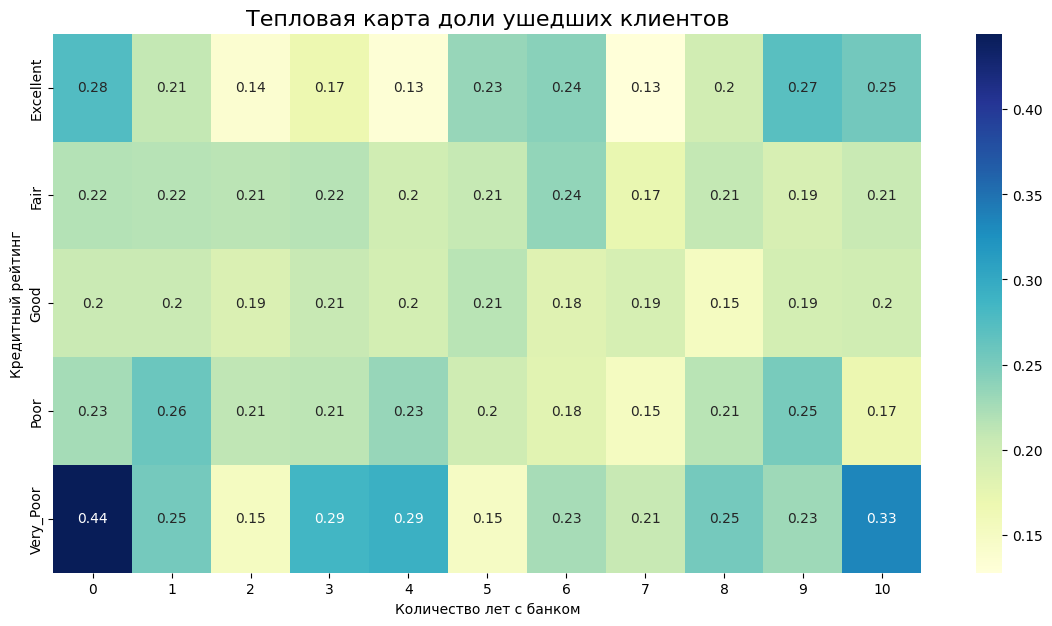

In [56]:
# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент 
# пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

# Строим сводную таблицу
pivot_2 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=0
)
# Строим координатную плоскость
fig_10, axes_10 = plt.subplots(figsize=(14, 7))

# Строим тепловую карту с аннотацией
axes_10 = sns.heatmap(data=pivot_2, cmap='YlGnBu', annot=True)
axes_10.set_title('Тепловая карта доли ушедших клиентов', fontsize=16);
axes_10.set_xlabel('Количество лет с банком')
axes_10.set_ylabel('Кредитный рейтинг');

# На тепловой карте видно, что самый большой отток клиентов среди категории клиентов с очень низким кредитным рейтингом, пользующихся услугами банка менее года.
# В целом отток клиентов наибольший среди категории с очень низким кредитным рейтингом. Однако какой-либо тенденции к уменьшению оттока с повышением кредитного 
# рейтинга и увеличением количества лет с банком я не вижу, т.к среди пользователей с кредитным рейтингом Excellent и опытом пользования 9 - 10 лет тоже 
# просматривается большой отток.
 